In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_co_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          9.5767 ( 8.5040, 10.8048) ( 8.4490, 10.7302)  2.2813 (Jnode 106)\n',
 't_n56          9.4745 ( 8.4202, 10.6598) ( 8.3427, 10.5667)  2.2240 (Jnode 105)\n',
 't_n57          9.0739 ( 8.1102, 10.1553) ( 8.0486, 10.0774)  2.0288 (Jnode 104)\n',
 't_n58          8.1135 ( 7.3666,  8.9775) ( 7.3444,  8.9432)  1.5988 (Jnode 103)\n',
 't_n59          7.9212 ( 7.2086,  8.7545) ( 7.1573,  8.6877)  1.5304 (Jnode 102)\n',
 't_n60          7.6494 ( 6.9784,  8.4456) ( 6.9266,  8.3772)  1.4507 (Jnode 101)\n',
 't_n61          7.2338 ( 6.6085,  7.9808) ( 6.5860,  7.9375)  1.3515 (Jnode 100)\n',
 't_n62          3.7766 ( 2.4965,  4.8498) ( 2.6335,  4.9566)  2.3230 (Jnode 99)\n',
 't_n63          5.5721 ( 4.9288,  6.2951) ( 4.8978,  6.2549)  1.3571 (Jnode 98)\n',
 't_n64          4.3528 ( 3.6926,  5.0901) ( 3.6481,  5.0304)  1.3823 (Jnode 97)\n',
 't_n65          3.9401 ( 3.3016,  4.6627) ( 3.2770,  4.6172)  1.3402 (Jnode 96)\n',
 't_n66          3.1991 ( 2.6097,  3.8695) ( 2.5634,  3.80

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[9.5767,
 9.4745,
 9.0739,
 8.1135,
 7.9212,
 7.6494,
 7.2338,
 3.7766,
 5.5721,
 4.3528,
 3.9401,
 3.1991,
 2.2703,
 1.5632,
 0.7334,
 4.3284,
 7.7784,
 7.5967,
 7.2395,
 5.4573,
 4.9485,
 5.2901,
 7.5679,
 7.2751,
 7.0746,
 6.6958,
 6.2304,
 6.0863,
 5.4029,
 4.9796,
 4.6097,
 3.5711,
 3.3227,
 5.4268,
 4.4934,
 7.4486,
 1.62,
 7.3077,
 6.8983,
 6.2272,
 5.8392,
 4.3776,
 5.0152,
 5.9774,
 5.7788,
 5.4114,
 4.0117,
 5.2462,
 8.3893,
 6.4826,
 4.2021,
 3.6065,
 6.4108]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_co_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[11.5133,
 11.3993,
 10.526,
 9.3662,
 8.9827,
 8.506,
 7.8188,
 4.3775,
 6.1195,
 4.769,
 4.1669,
 3.2929,
 2.2873,
 1.5568,
 0.7175,
 4.7394,
 8.5698,
 7.2037,
 7.7828,
 5.7834,
 4.9481,
 5.4336,
 8.6259,
 8.1174,
 7.7566,
 7.3025,
 6.7314,
 6.4347,
 5.6625,
 5.1296,
 4.6264,
 3.6692,
 3.1983,
 5.7662,
 4.5933,
 8.3677,
 2.6975,
 8.0756,
 7.4859,
 6.6366,
 6.052,
 4.5921,
 4.9189,
 6.3879,
 5.8549,
 4.9785,
 4.4407,
 5.489,
 9.5604,
 7.4096,
 4.7546,
 4.601,
 8.4264]

In [12]:
posterior_mean_iqtree

[9.5767,
 9.4745,
 9.0739,
 8.1135,
 7.9212,
 7.6494,
 7.2338,
 3.7766,
 5.5721,
 4.3528,
 3.9401,
 3.1991,
 2.2703,
 1.5632,
 0.7334,
 4.3284,
 7.7784,
 7.5967,
 7.2395,
 5.4573,
 4.9485,
 5.2901,
 7.5679,
 7.2751,
 7.0746,
 6.6958,
 6.2304,
 6.0863,
 5.4029,
 4.9796,
 4.6097,
 3.5711,
 3.3227,
 5.4268,
 4.4934,
 7.4486,
 1.62,
 7.3077,
 6.8983,
 6.2272,
 5.8392,
 4.3776,
 5.0152,
 5.9774,
 5.7788,
 5.4114,
 4.0117,
 5.2462,
 8.3893,
 6.4826,
 4.2021,
 3.6065,
 6.4108]

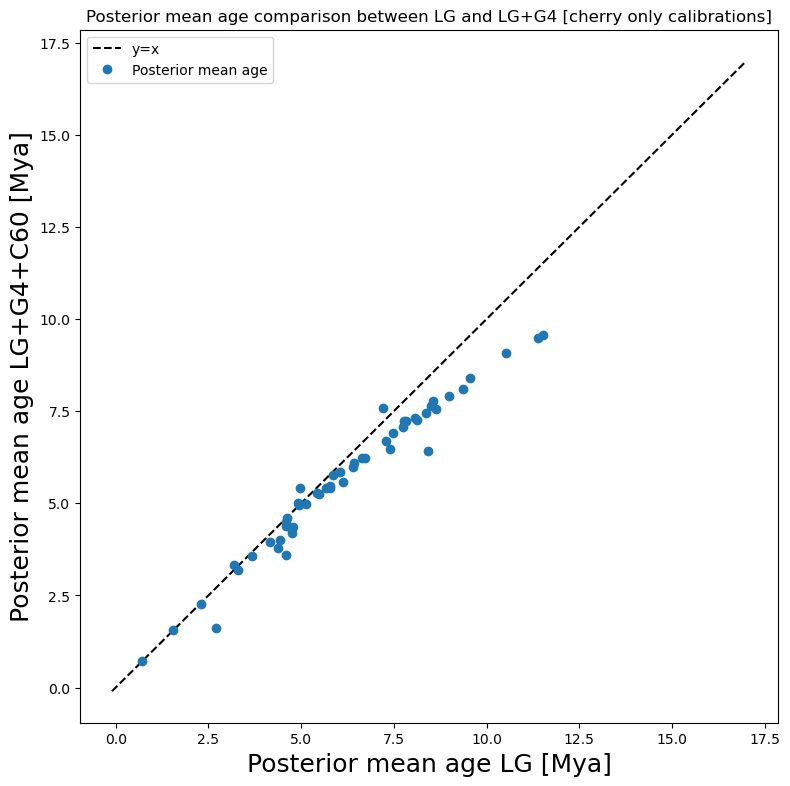

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_co_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')